**Breast cancer is the most common form of cancer in women, and invasive  ductal carcinoma (IDC) is the most common form of breast cancer. Accurately identifying and categorizing breast cancer subtypes is an important clinical task, and automated methods can be used to save time and reduce error**

**This project depends on two datasets :
The first Dataset is cbis-ddsm-breast-cancer-image-dataset from . the second Dataset is breast-histopathology-images**

**Data Exploration**

In [1]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [2]:
dicom_data = pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')

In [3]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [5]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [6]:
image_dir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [7]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     ../input/cbis-ddsm-breast-cancer-image-dataset...
3     ../input/cbis-ddsm-breast-cancer-image-dataset...
6     ../input/cbis-ddsm-breast-cancer-image-dataset...
7     ../input/cbis-ddsm-breast-cancer-image-dataset...
10    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

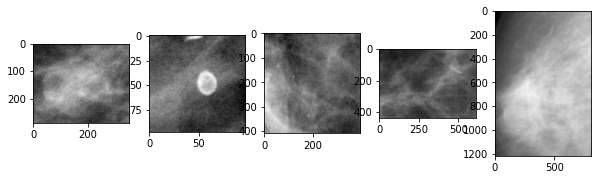

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  

for i, file in enumerate(cropped_images[0:5]):
    cropped_images_show = PIL.Image.open(file)
    gray_img = cropped_images_show.convert("L")
    
    plt.subplot(1, 5, i + 1) 
    plt.imshow(gray_img, cmap='gray')
    
plt.show() 


In [9]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [10]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     ../input/cbis-ddsm-breast-cancer-image-dataset...
2     ../input/cbis-ddsm-breast-cancer-image-dataset...
11    ../input/cbis-ddsm-breast-cancer-image-dataset...
12    ../input/cbis-ddsm-breast-cancer-image-dataset...
15    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

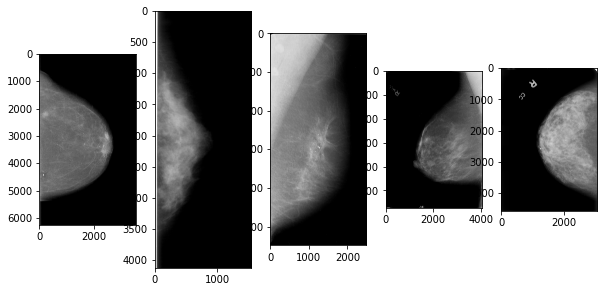

In [11]:

plt.figure(figsize=(10, 10))  
for i, file in enumerate(full_mammogram_images[0:5]):
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    
    plt.subplot(1, 5, i + 1)  
    plt.imshow(gray_img, cmap='gray')
plt.show()  


In [12]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [13]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     ../input/cbis-ddsm-breast-cancer-image-dataset...
8     ../input/cbis-ddsm-breast-cancer-image-dataset...
9     ../input/cbis-ddsm-breast-cancer-image-dataset...
14    ../input/cbis-ddsm-breast-cancer-image-dataset...
20    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

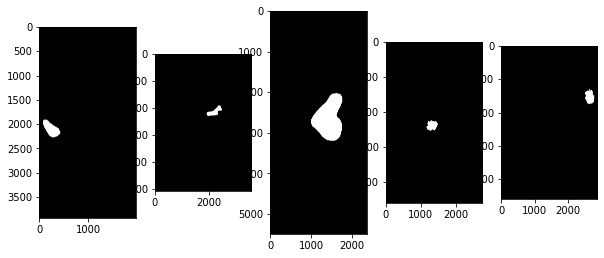

In [14]:
plt.figure(figsize=(10, 10))  

for i, file in enumerate(ROI_mask_images[0:5]):
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img = ROI_mask_images_show.convert("L")
    plt.subplot(1, 5, i + 1)  
    plt.imshow(gray_img, cmap='gray')
plt.show()  


In [15]:
data_1=pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')

In [16]:
data_1.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [17]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [18]:
data_1.describe()

,breast density,abnormality id,assessment,subtlety
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.663648,1.415265,3.258732,3.411384
std,0.937219,0.903571,1.229231,1.179754
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


In [19]:
data_2=pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')

In [20]:
data_2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [21]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [22]:
data_2.describe()

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


 **Data Cleaning**

In [23]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [24]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True) 

In [25]:
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [26]:
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [27]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [28]:
dicom_cleaning_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [29]:
Data_cleaning_1 = data_1.copy()

In [30]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

In [31]:
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [32]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [33]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

In [34]:
Data_cleaning_1.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [35]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [36]:
Data_cleaning_2 = data_2.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [37]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [38]:
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [39]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True) 

In [40]:
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [41]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

**Data Visualization**

In [42]:
breast_img = glob.glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)


In [43]:
for imgname in breast_img[:3]:
    print(imgname)

../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png


In [44]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)

In [45]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer 
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [46]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

In [47]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

from breast-histopathology-images Dataset , we coclude that from the above chart that : **Cases with No cancer (0) is more than Cases with cancer(1)**                                                          

In [48]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription,SeriesDescription_counts
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [49]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; cropped images , ROI images , Full mammogram images . **from this graph we conclude that cropped images is the most used between them**

In [50]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

,PatientOrientation,PatientOrientation_counts
0,MLO,5434
1,CC,4803


In [51]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation', values='PatientOrientation_counts', color = 'PatientOrientation')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

from cbis-ddsm-breast-cancer-image-dataset in general : **PatientOrientation (image_view) from the above graph MLO is much used than CC**

In [52]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

,abnormality,counts_of_abnormalties
0,calcification,1546
1,mass,1318


In [53]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

from this gragh : **They are two abnormalities of breast cancer ; Calcification abnormality and Mass abnormality . and Most cases are with calcification abnormalities**

In [54]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [55]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHT','LEFT'] , 'Counts':[x,y]})
data_insight_3

,left_or_right_breast,Counts
0,RIGHT,728
1,LEFT,818


In [56]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' calcfication cancer position of breast ', title_x=0.5)
insight_3.show()

**For Calcfication Cancer , most Cacification Cancer obtains in the Left Breast**

In [57]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

,index,calc_type_counts
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [58]:
bar_3 =px.bar(data_frame=z, y = 'index', x='calc_type_counts', color = 'index', orientation='h')
bar_3.update_layout(title_text='Types of calcification cancer', title_x=0.5,xaxis=dict(type='log'))
bar_3.show()

**Calcfication cancer has 45 types , Most of them obtain is PLEOMORPHIC**

In [59]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

,index,calc_distribution_counts
0,CLUSTERED,1000
1,SEGMENTAL,214
2,REGIONAL,118
3,LINEAR,111
4,CLUSTERED-LINEAR,49
5,DIFFUSELY_SCATTERED,43
6,CLUSTERED-SEGMENTAL,5
7,LINEAR-SEGMENTAL,5
8,REGIONAL-REGIONAL,1


In [60]:
bar_4 =px.bar(data_frame=g, x = 'index', y='calc_distribution_counts', color = 'index', orientation='v')
bar_4.update_layout(title_text='Types of Distribution of calcification  cancer', title_x=0.5,yaxis=dict(type='log'))
bar_4.show()

**for calcification cancer , there are 9 Types of Distribution of calcification cancer , Most of them obtained is Clustered**

In [61]:
I = pd.DataFrame(Data_cleaning_1['breast_density'].value_counts())
I =I.reset_index()
I= I.rename(columns={'index':'Breast density','breast_density':'counts'})
I

,Breast density,counts
0,3,539
1,2,501
2,4,331
3,1,175


In [62]:
bar_5 =px.pie(data_frame=I, names= 'Breast density', values='counts', color = 'Breast density')
bar_5.update_layout(title_text='The percenyages of Breast Density of calcification  cancer', title_x=0.5)
bar_5.show()

**For calcification cancer , There are 4 breast Density , Most of them found is 3**

In [63]:
h = pd.DataFrame(Data_cleaning_1['assessment'].value_counts())
h =h.reset_index()
h=h.rename(columns={'index':'Breast assessment','assessment':'counts'})
h

,Breast assessment,counts
0,4,753
1,2,482
2,5,159
3,3,89
4,0,63


In [64]:
fig =px.pie(data_frame=h, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig.update_layout(title_text='The Percentages of assessment Breast calcification  cancer', title_x=0.5)
fig.show()

**For calcfication cancer , There are 5 Types of assessments , Most of them obtains is 4**

In [65]:
v = pd.DataFrame(Data_cleaning_1['subtlety'].value_counts())
v =v.reset_index()
v=v.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
v

,Breast subtlety,counts
0,3,502
1,5,361
2,4,346
3,2,242
4,1,95


In [66]:
fig_1=px.pie(data_frame=v, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_1.update_layout(title_text='The Percentages of subtlety Breast calcification  cancer', title_x=0.5)
fig_1.show()

**For calcification cancer , There are 5 Subtlety , Most of them found is 3**

In [67]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a

,pathology,counts
0,MALIGNANT,544
1,BENIGN,528
2,BENIGN_WITHOUT_CALLBACK,474


In [68]:
fig_2 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_2.update_layout(title_text='pathology of calcification  cancer', title_x=0.5)
fig_2.show()

**For calcification Cancer ,In Most Cases caner is Malignant**

In [69]:
b = pd.DataFrame(Data_cleaning_1['image_view'].value_counts())
b =b.reset_index()
b=b.rename(columns={'index':'image_view','image_view':'counts'})
b

,image_view,counts
0,MLO,807
1,CC,739


In [70]:
fig_3=px.pie(data_frame=b, values = 'counts', names='image_view', color = 'image_view')
fig_3.update_layout(title_text='The Percentages of image_view used in calcification  cancer', title_x=0.5)
fig_3.show()

**For calcification Cancer , Most image view used is MLO (52.2%)**

In [71]:
j = pd.DataFrame(Data_cleaning_2['breast_density'].value_counts())
j =j.reset_index()
j= j.rename(columns={'index':'Breast density','breast_density':'counts'})
j

,Breast density,counts
0,2,585
1,3,337
2,1,287
3,4,109


In [72]:
fig_4 =px.pie(data_frame=j, names= 'Breast density', values='counts', color = 'Breast density')
fig_4.update_layout(title_text='The percenyages of Breast Density of mass  cancer', title_x=0.5)
fig_4.show()

**for Mass Cancer , There are 4 values of Density Breast , Most of them found is 2**

In [73]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})
k

,left_or_right_breast,counts
0,RIGHT,687
1,LEFT,631


In [74]:
fig_5 =px.bar(data_frame=k, x = 'left_or_right_breast', y='counts', color = 'left_or_right_breast', orientation='v')
fig_5.update_layout(title_text='position of mass cancer', title_x=0.5)
fig_5.show()

**For Mass Cancer, Most cases ,Cancer is the Right Breast**

In [75]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})
p

,pathology,counts
0,MALIGNANT,637
1,BENIGN,577
2,BENIGN_WITHOUT_CALLBACK,104


In [76]:
fig_6 =px.bar(data_frame=p, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass  cancer', title_x=0.5)
fig_6.show()

**for Mass Cancer , Most Cases of cancer is Malignant**

In [77]:
c = pd.DataFrame(Data_cleaning_2['subtlety'].value_counts())
c =c.reset_index()
c=c.rename(columns={'index':'Breast subtlety','subtlety':'counts'})

In [78]:
fig_7=px.pie(data_frame=c, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_7.update_layout(title_text='The Percentages of subtlety Breast mass  cancer', title_x=0.5)
fig_7.show()

**For Mass Cancer , There are 6 Subtlety , Most of them found is 5** 

In [79]:
o = pd.DataFrame(Data_cleaning_2['assessment'].value_counts())
o =o.reset_index()
o=o.rename(columns={'index':'Breast assessment','assessment':'counts'})
o

,Breast assessment,counts
0,4,533
1,5,299
2,3,279
3,0,129
4,2,77
5,1,1


In [80]:
fig_8 =px.pie(data_frame=o, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig_8.update_layout(title_text='The Percentages of assessment Breast mass cancer', title_x=0.5)
fig_8.show()

**for Mass Cancer, There are 6 assessment , Most of them found is 4**

In [81]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})
s

,index,mass_shape_counts
0,IRREGULAR,351
1,OVAL,323
2,LOBULATED,305
3,ROUND,123
4,ARCHITECTURAL_DISTORTION,80
5,IRREGULAR-ARCHITECTURAL_DISTORTION,47
6,LYMPH_NODE,26
7,ASYMMETRIC_BREAST_TISSUE,20
8,FOCAL_ASYMMETRIC_DENSITY,19
9,OVAL-LYMPH_NODE,6


In [82]:
fig_9 =px.bar(data_frame=s, y = 'index', x='mass_shape_counts', color = 'index', orientation='h')
fig_9.update_layout(title_text='Types of Mass_shape of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_9.show()

**For Mass Cancer , There are 18 types of Mass_shape , Most off them found is IRREGULAR**

In [83]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})
u

,mass_margins,counts
0,CIRCUMSCRIBED,305
1,SPICULATED,303
2,ILL_DEFINED,288
3,OBSCURED,201
4,MICROLOBULATED,113
5,CIRCUMSCRIBED-ILL_DEFINED,27
6,ILL_DEFINED-SPICULATED,26
7,CIRCUMSCRIBED-OBSCURED,19
8,OBSCURED-ILL_DEFINED,19
9,OBSCURED-ILL_DEFINED-SPICULATED,4


In [84]:
fig_10=px.bar(data_frame=u, y = 'mass_margins', x='counts', color = 'mass_margins', orientation='h')
fig_10.update_layout(title_text='Types of Mass_margins of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_10.show()

**for Mass Cancer , There are 15 type of Mass_margins , most of them found is CIRCUMSCRIBED**

In [85]:
t= pd.DataFrame(Data_cleaning_2['image_view'].value_counts())
t=t.reset_index()
t=t.rename(columns={'index':'image_view','image_view':'counts'})
t

,image_view,counts
0,MLO,711
1,CC,607


In [86]:
fig_11=px.pie(data_frame=t, values = 'counts', names='image_view', color = 'image_view')
fig_11.update_layout(title_text='The Percentages of image_view used in mass cancer', title_x=0.5)
fig_11.show()

**For Mass cancer , Most image_view used is MLO (53.9%)**

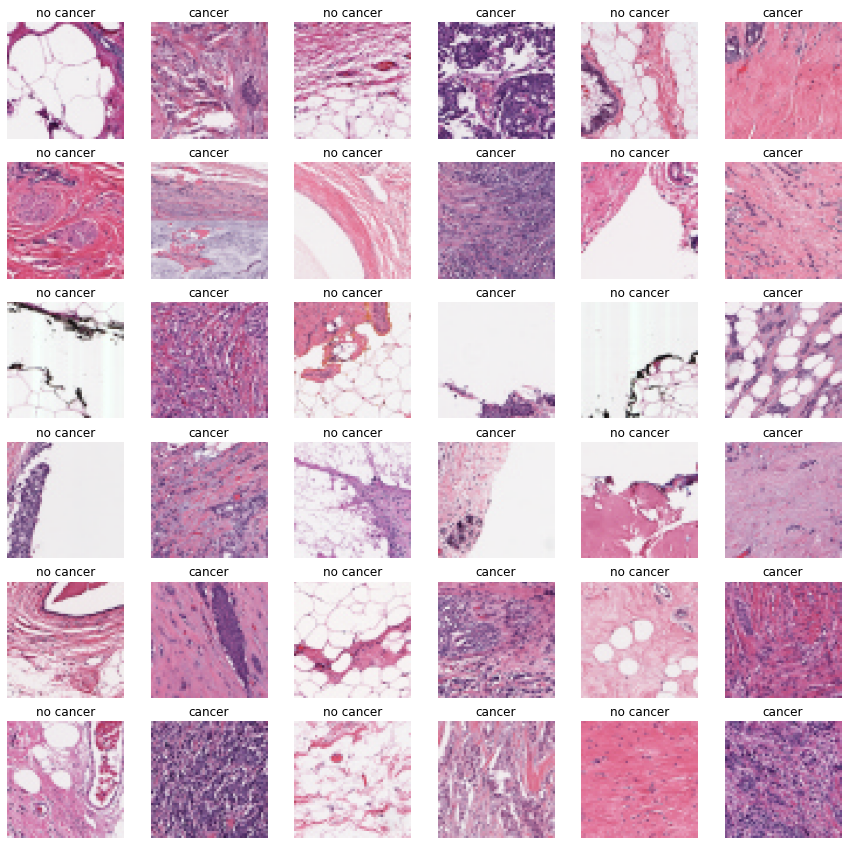

In [87]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

**Data Modeling**

In [88]:
import random
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

# Paths to example images from each dataset
histopathology_img_path = "/kaggle/input/breast-histopathology-images/10254/1/10254_idx5_x1601_y1351_class1.png"
ddsm_img_path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100522099512256189513864912954167862869/1-231.jpg"

target_size = (100, 100)
batch_size = 32

non_can_img = []
can_img = []
for img in breast_img:
    if img[-5] == '0':
        non_can_img.append(img)
    elif img[-5] == '1':
        can_img.append(img)

#smaller random sample to reduce dataset size
sample_non_can_img = random.sample(non_can_img, min(1000, len(non_can_img)))
sample_can_img = random.sample(can_img, min(1000, len(can_img)))



In [89]:
import cv2
import numpy as np

target_size = (100, 100)

def load_and_preprocess_images(image_paths):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None: 
            img = cv2.resize(img, target_size)  # Ensure resizing to (100, 100)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # to RGB
            img = img / 255.0  # Normalize 
            images.append(img)
        else:
            print(f"Warning: Unable to load image at {img_path}")
    return np.array(images)

non_cancer_images = load_and_preprocess_images(sample_non_can_img)
cancer_images = load_and_preprocess_images(sample_can_img)


In [90]:
def create_pairs(non_cancer_images, cancer_images, num_pairs):
    pairs = []
    labels = []

    # positive pairs (cancer-cancer and non-cancer-non-cancer)
    for _ in range(num_pairs // 2):
        idx1 = random.randint(0, len(cancer_images) - 1)
        idx2 = random.randint(0, len(cancer_images) - 1)
        pairs.append((cancer_images[idx1], cancer_images[idx2]))
        labels.append(1)  # Positive label

        idx1 = random.randint(0, len(non_cancer_images) - 1)
        idx2 = random.randint(0, len(non_cancer_images) - 1)
        pairs.append((non_cancer_images[idx1], non_cancer_images[idx2]))
        labels.append(1)  # Positive label

    # negative pairs (cancer-non-cancer)
    for _ in range(num_pairs // 2):
        idx1 = random.randint(0, len(cancer_images) - 1)
        idx2 = random.randint(0, len(non_cancer_images) - 1)
        pairs.append((cancer_images[idx1], non_cancer_images[idx2]))
        labels.append(0)  # Negative label

    return np.array(pairs), np.array(labels)

num_pairs = 1000
pairs, labels = create_pairs(non_cancer_images, cancer_images, num_pairs) #creating traing pairs

In [91]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
pairs_train, pairs_test, labels_train, labels_test = train_test_split(
    pairs, labels, test_size=0.2, random_state=42
)

In [92]:
# Define the base CNN model for feature extraction
def create_base_network(input_shape):
    input = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D()(x)
    
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='sigmoid')(x)
    return Model(input, x)


In [93]:
# Siamese network architecture
def siamese_network(input_shape):
    base_network = create_base_network(input_shape)
    input_a = layers.Input(shape=input_shape)
    input_b = layers.Input(shape=input_shape)
    processed_a = base_network(input_a)
    processed_b = base_network(input_b)
    distance = layers.Lambda(lambda x: K.abs(x[0] - x[1]))([processed_a, processed_b])
    output = layers.Dense(1, activation='sigmoid')(distance)
    model = Model([input_a, input_b], output)
    return model


In [94]:
def contrastive_loss(y_true, y_pred):
    margin = 1.0
    y_true = tf.cast(y_true, tf.float32)  # Convert y_true to float32 to match y_pred
    return tf.reduce_mean(y_true * tf.square(y_pred) + (1 - y_true) * tf.square(tf.maximum(margin - y_pred, 0)))


In [95]:
input_shape = (100, 100, 3)
'''
model = siamese_network(input_shape)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss=contrastive_loss, metrics=['accuracy'])
'''

# Extract image pairs for training and testing
X1_train = np.array([pair[0] for pair in pairs_train])
X2_train = np.array([pair[1] for pair in pairs_train])
X1_test = np.array([pair[0] for pair in pairs_test])
X2_test = np.array([pair[1] for pair in pairs_test])

print(X1_train.shape) 
print(X2_train.shape)  
print(X1_test.shape)   
print(X2_test.shape)   

(1200, 100, 100, 3)
(1200, 100, 100, 3)
(300, 100, 100, 3)
(300, 100, 100, 3)


In [96]:
# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X1_train)

In [97]:
# Function to create a generator for pairs
def pair_generator(X1, X2, labels, batch_size):
    while True:  # Loop forever so that the generator never terminates
        indices = np.random.permutation(len(X1))
        for start in range(0, len(X1), batch_size):
            end = min(start + batch_size, len(X1))
            batch_indices = indices[start:end]

            X1_batch = np.array([X1[i] for i in batch_indices])
            X2_batch = np.array([X2[i] for i in batch_indices])
            y_batch = np.array([labels[i] for i in batch_indices])

            # Generate augmented images
            augmented_X1 = datagen.flow(X1_batch, batch_size=batch_size, shuffle=False)
            augmented_X2 = datagen.flow(X2_batch, batch_size=batch_size, shuffle=False)

            # Yield augmented pairs and their corresponding labels
            yield [augmented_X1.next(), augmented_X2.next()], y_batch

tuning

In [98]:
import keras_tuner as kt
from tensorflow.keras import optimizers

def build_model(hp):
    input_shape = (100, 100, 3)
    model = siamese_network(input_shape)  # Assuming you have defined your siamese_network function

    # Hyperparameters to tune
    optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
    
    # Initialize the optimizer based on the chosen name
    if optimizer_name == 'adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, 
                  loss=contrastive_loss, 
                  metrics=['accuracy'])
    return model


In [99]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='siamese_tuning'
)

num_batches = len(X1_train) // batch_size

# Start tuning with your pair generator
tuner.search(pair_generator(X1_train, X2_train, labels_train, batch_size),
             steps_per_epoch=num_batches,
             epochs=10,
             validation_data=([X1_test, X2_test], labels_test))
'''
Trial 60 Complete [00h 01m 23s]
val_accuracy: 0.4333333373069763

Best val_accuracy So Far: 0.6166666746139526
Total elapsed time: 00h 21m 56s

Trial 60 Complete [00h 00m 57s]
val_accuracy: 0.5133333206176758

Best val_accuracy So Far: 0.6466666460037231
Total elapsed time: 00h 25m 36s
'''


Trial 60 Complete [00h 00m 55s]
val_accuracy: 0.5133333206176758

Best val_accuracy So Far: 0.653333306312561
Total elapsed time: 00h 25m 12s


'\nTrial 60 Complete [00h 01m 23s]\nval_accuracy: 0.4333333373069763\n\nBest val_accuracy So Far: 0.6166666746139526\nTotal elapsed time: 00h 21m 56s\n\nTrial 60 Complete [00h 00m 57s]\nval_accuracy: 0.5133333206176758\n\nBest val_accuracy So Far: 0.6466666460037231\nTotal elapsed time: 00h 25m 36s\n'

In [100]:
best_model = tuner.get_best_models(num_models=1)[0]

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Learning Rate: {best_hyperparameters.get('learning_rate')}")
print(f"Best Optimizer: {best_hyperparameters.get('optimizer')}")


Best Learning Rate: 3.4371369161912445e-05
Best Optimizer: rmsprop


In [101]:
best_optimizer = best_hyperparameters.get('optimizer')  # Retrieve the best optimizer
best_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


oversampling minority class

In [102]:
from imblearn.over_sampling import RandomOverSampler

#Combining to maintain the input shape
X_train_combined = np.concatenate([X1_train, X2_train], axis=0)
y_train_combined = np.concatenate([labels_train, labels_train], axis=0)

X_train_flat = X_train_combined.reshape(X_train_combined.shape[0], -1)
ros = RandomOverSampler(random_state=42)
X_resampled_flat, y_resampled = ros.fit_resample(X_train_flat, y_train_combined)
#Reshape back 
X_resampled = X_resampled_flat.reshape(-1, *input_shape)
X1_train_resampled, X2_train_resampled = X_resampled[:len(X_resampled) // 2], X_resampled[len(X_resampled) // 2:]
labels_train_resampled = y_resampled


In [103]:
from sklearn.utils import class_weight

# labels (0 for no cancer, 1 for cancer)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', #based on freq
    classes=np.unique(labels_train),
    y=labels_train
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

num_batches = len(X1_train) // batch_size
'''
# Train the model with the generator
history = model.fit(
    pair_generator(X1_train, X2_train, labels_train, batch_size),
    steps_per_epoch=num_batches,
    class_weight=class_weight_dict,
    epochs=10,
    validation_data=([X1_test, X2_test], labels_test)  # Validation without augmentation
)'''

'\n# Train the model with the generator\nhistory = model.fit(\n    pair_generator(X1_train, X2_train, labels_train, batch_size),\n    steps_per_epoch=num_batches,\n    class_weight=class_weight_dict,\n    epochs=10,\n    validation_data=([X1_test, X2_test], labels_test)  # Validation without augmentation\n)'

In [107]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#to stop training if validation loss does not improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, 
    restore_best_weights=True, 
)
model_checkpoint = ModelCheckpoint(
    'best_model.h5',  
    monitor='val_loss',
    save_best_only=True,  
)

# Training with callbacks
history= best_model.fit(
    pair_generator(X1_train_resampled, X2_train_resampled, labels_train_resampled, batch_size),
    steps_per_epoch=num_batches,
    class_weight=class_weight_dict,
    epochs=10,
    validation_data=([X1_test, X2_test], labels_test),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
37/37 [==============================] - 7s 160ms/step - loss: 0.7641 - accuracy: 0.5025 - val_loss: 0.7783 - val_accuracy: 0.4733
Epoch 2/10
37/37 [==============================] - 5s 149ms/step - loss: 0.7539 - accuracy: 0.4898 - val_loss: 0.7244 - val_accuracy: 0.3967
Epoch 3/10
37/37 [==============================] - 5s 149ms/step - loss: 0.7291 - accuracy: 0.5137 - val_loss: 0.7280 - val_accuracy: 0.4900
Epoch 4/10
37/37 [==============================] - 6s 152ms/step - loss: 0.7274 - accuracy: 0.5228 - val_loss: 0.6957 - val_accuracy: 0.5267
Epoch 5/10
37/37 [==============================] - 5s 149ms/step - loss: 0.7256 - accuracy: 0.4625 - val_loss: 0.7191 - val_accuracy: 0.5400
Epoch 6/10
37/37 [==============================] - 5s 149ms/step - loss: 0.7189 - accuracy: 0.4966 - val_loss: 0.7448 - val_accuracy: 0.4433
Epoch 7/10
37/37 [==============================] - 5s 147ms/step - loss: 0.7365 - accuracy: 0.4889 - val_loss: 0.7316 - val_accuracy: 0.4667
Epoch 

testing

In [108]:

# Evaluate the model on test data
loss, accuracy = best_model.evaluate([X1_test, X2_test], labels_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


10/10 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.5267
Test Loss: 0.6957, Test Accuracy: 0.5267


Confusion Matrix:
 [[ 42  68]
 [ 74 116]]


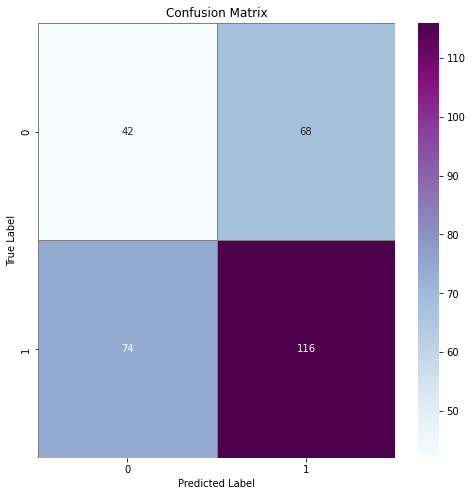

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict similarity scores
predictions = best_model.predict([X1_test, X2_test])

threshold = 0.5
pred_labels = (predictions > threshold).astype(int)

confusion_mtx = confusion_matrix(labels_test, pred_labels)
print("Confusion Matrix:\n",confusion_mtx)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="BuPu", linewidths=0.5, linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


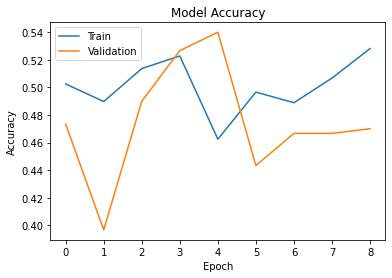

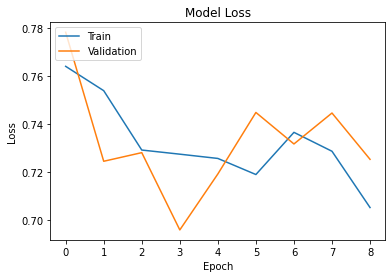

In [110]:
# Plotting accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


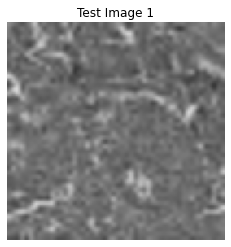

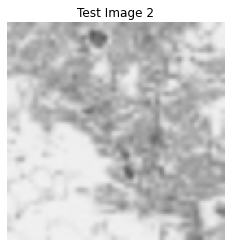

Predicted Similarity Score: 0.52
True Label: 0


In [111]:
import matplotlib.pyplot as plt

def img_plot(arr, title="Image"):
    plt.imshow(arr.squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

index = 67
img_plot(X1_test[index], title="Test Image 1")
img_plot(X2_test[index], title="Test Image 2")

pred_similarity = best_model.predict([X1_test[index:index+1], X2_test[index:index+1]])[0][0]
true_label = labels_test[index]
print(f'Predicted Similarity Score: {pred_similarity:.2f}')
print(f'True Label: {true_label}')


In [112]:
best_model.save('best_model.h5')  

import shutil

shutil.make_archive('my_siamese_model', 'zip', '.', 'best_model.h5')
print("Model saved and zipped successfully.")


Model saved and zipped successfully.


In [113]:
#to clear prev cheackpoints
'''
import shutil

# Specify the directory containing the tuning results
checkpoint_dir = '/kaggle/working/my_dir/siamese_tuning'

# Delete the entire directory along with all its contents
shutil.rmtree(checkpoint_dir)

# Re-create the directory for fresh checkpointing (optional, only if you plan to save new results here)
os.makedirs(checkpoint_dir, exist_ok=True)
'''


"\nimport shutil\n\n# Specify the directory containing the tuning results\ncheckpoint_dir = '/kaggle/working/my_dir/siamese_tuning'\n\n# Delete the entire directory along with all its contents\nshutil.rmtree(checkpoint_dir)\n\n# Re-create the directory for fresh checkpointing (optional, only if you plan to save new results here)\nos.makedirs(checkpoint_dir, exist_ok=True)\n"